In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uproot
import dftools

In [3]:
plt.style.use("cms")

In [4]:
f = uproot.open("data_pileup.root")
hist_data_nominal, bins = f["pileup_nominal"].numpy()
hist_data_up, _ = f["pileup_up"].numpy()
hist_data_down, _ = f["pileup_down"].numpy()

In [5]:
f = uproot.open("mc_pileup.root")
hist_mc, _ = f["pileup"].numpy()

In [6]:
hist_ratio_nominal = np.divide(hist_data_nominal/hist_data_nominal.sum(), hist_mc/hist_mc.sum(), out=np.zeros_like(hist_mc), where=(hist_mc!=0))
hist_ratio_up = np.divide(hist_data_up/hist_data_nominal.sum(), hist_mc/hist_mc.sum(), out=np.zeros_like(hist_mc), where=(hist_mc!=0))
hist_ratio_down = np.divide(hist_data_down/hist_data_nominal.sum(), hist_mc/hist_mc.sum(), out=np.zeros_like(hist_mc), where=(hist_mc!=0))

In [7]:
hist_relunc_up = np.divide(hist_ratio_up, hist_ratio_nominal, out=np.zeros_like(hist_ratio_nominal), where=(hist_ratio_nominal!=0))
hist_relunc_down = np.divide(hist_ratio_down, hist_ratio_nominal, out=np.zeros_like(hist_ratio_nominal), where=(hist_ratio_nominal!=0))

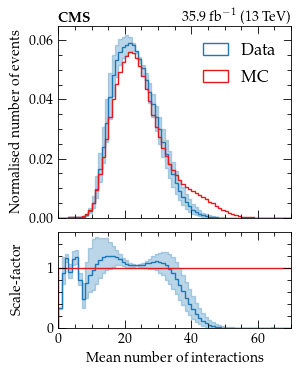

In [22]:
fig, ax = plt.subplots(
    figsize=(3, 4), dpi=100,
    nrows=2, ncols=1, sharex=True, sharey=False,
    gridspec_kw=dict(height_ratios=[2,1], wspace=0.1, hspace=0.1),
)

norm = hist_data_nominal.sum()
ax[0].hist(
    bins[:-1], bins=bins, weights=hist_data_nominal/norm,
    histtype='step', color="#1f78b4", label="Data",
)
ax[0].set_xlim(bins.min(), 70)

ax[0].fill_between(
    bins,
    np.array(list(hist_data_up)+[hist_data_up[-1]])/norm,
    np.array(list(hist_data_down)+[hist_data_down[-1]])/norm,
    step='post', color='#1f78b4', alpha=0.3,
)

ax[0].hist(
    bins[:-1], bins=bins, weights=hist_mc/hist_mc.sum(),
    histtype='step', color="#e31a1c", label="MC",
)
ax[0].set_ylabel("Normalised number of events")
dftools.draw.cms_label(ax[0], "")

ax[1].hist(
    bins[:-1], bins=bins, weights=hist_ratio_nominal,
    histtype='step', color='#1f78b4'
)
ax[1].fill_between(
    bins, list(hist_ratio_up)+[hist_ratio_up[-1]], list(hist_ratio_down)+[hist_ratio_down[-1]],
    step='post', color='#1f78b4', alpha=0.3,
)

ax[1].hist(
    bins[:-1], bins=bins, weights=np.divide(hist_mc, hist_mc, out=np.ones_like(hist_mc), where=(hist_mc!=0)),
    histtype='step', color="#e31a1c",
)
ax[1].set_ylabel("Scale-factor")

#ax[2].hist(
#    bins[:-1], bins=bins, weights=np.divide(hist_ratio_nominal, hist_ratio_nominal, out=np.ones_like(hist_ratio_nominal), where=(hist_ratio_nominal!=0)),
#    histtype='step', color='#1f78b4',
#)
#ax[2].fill_between(
#    bins, list(hist_relunc_up)+[hist_relunc_up[-1]], list(hist_relunc_down)+[hist_relunc_down[-1]],
#    step='post', color='#1f78b4', alpha=0.3,
#)
#ax[2].set_ylim(0., 2.)
#ax[2].set_ylabel("Rel. unc.")
#
ax[1].set_xlabel(r'Mean number of interactions')

ax[0].legend(*ax[0].get_legend_handles_labels(), loc=1)

fig.align_ylabels(ax)
fig.savefig("pileup.pdf", format='pdf', bbox_inches='tight')
pass

In [27]:
average = (bins[:-1]*hist_data_nominal).sum()/hist_data_nominal.sum()
average

22.65548216226952

In [29]:
bins[hist_data_nominal.argmax()]

21.0